# Features in OLED devices

To fabricate OLED devices, there are various materials that are being used. Different materials are used for hole transporting layer(HTL), hole injection layer(HIL), buffer layer, electron transport layer(ETL) and of course the emissive layer(EML). There are many combination of the material and several architecture used in fabricating these devices. For this model, I am focusing on the BLUE OLED.


Now, let's take a look at the features used for our regression model. 
Every material has a distinct property. However each material has their own energy level, the lowest unoccupied molecular orbital(LUMO) and highest occupied molecular orbital(HOMO) that can be measured measured. Another parameter that can be changed is the thickness of each layer. So, these three features are going to be considered for our model.  

Let's import some dependencies first.

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
# change directory to excel file and read excel file
os.chdir('C:/Anaconda3/projects/oled')
df = pd.read_excel('oled.xlsx', sheetname='Sheet3')
#fill the missing data
df = df.fillna(value=0)

PS: There will be a lot of missing data since devices have different number of layers. Some devices use 2 different layers for charge transport (HTL and ETL). Therefore, there will be lots of zeros in the dataframe.

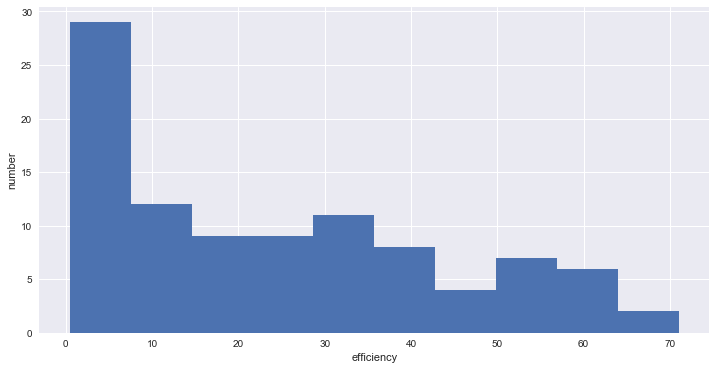

In [22]:
# device efficiency distribution
plt.rcParams['figure.figsize'] = (12.0, 6.0)
efficiency = df['cd/a']
plt.ylabel('number')
plt.xlabel('efficiency')
efficiency.hist()

From the above graph, we can observe that most of our data has efficiency less than 10 Cd/A and the distribution is not normal distribution. So maybe the model that we made is good at predicting lower efficiency devices but not so accurate in predicting higher efficiency devices.

Based on the features we selected, we can see their distribution and correlation to efficiency.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026215C6FF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002621673E630>]], dtype=object)

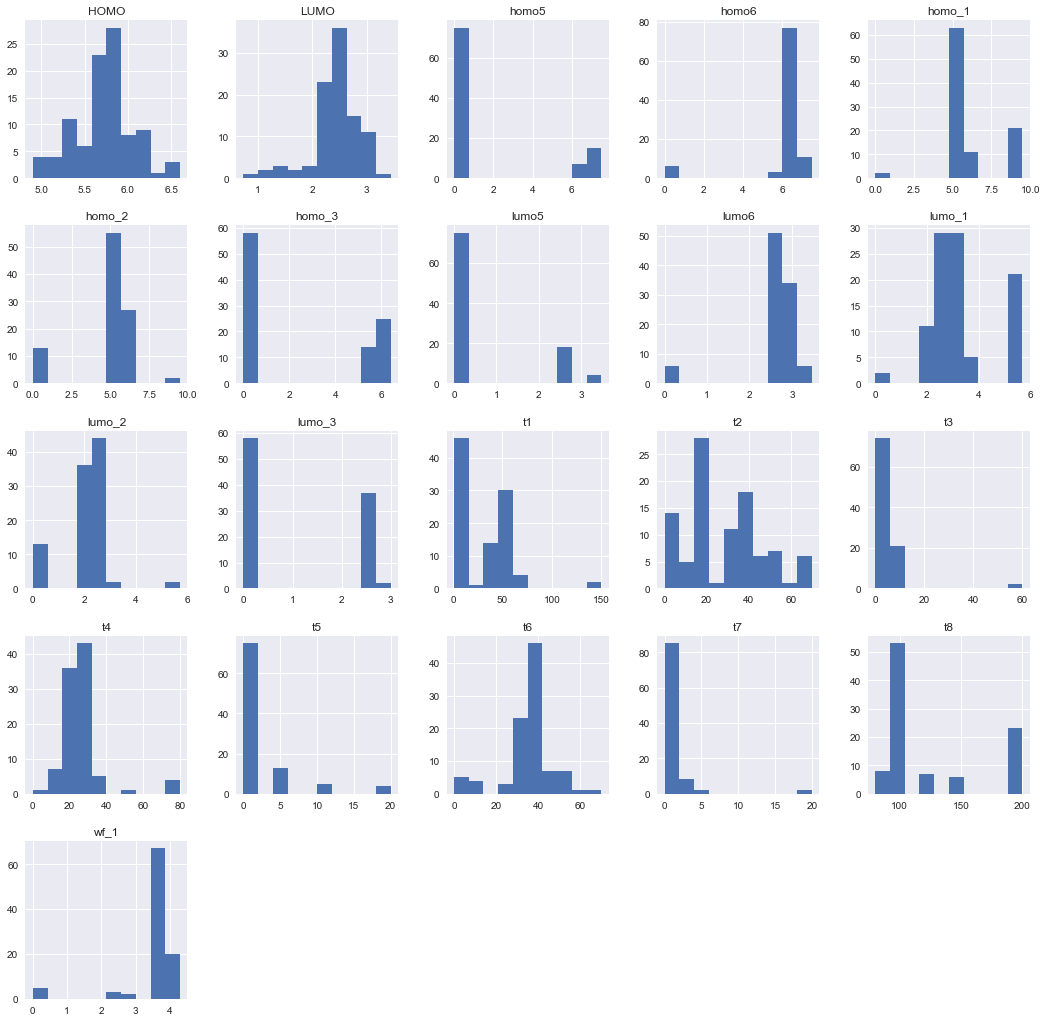

In [24]:
X = df[list(df.columns)[:-5]]
plt.rcParams['figure.figsize'] = (18.0, 18.0)
X.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262171FE0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000026217919FD0>]], dtype=object)

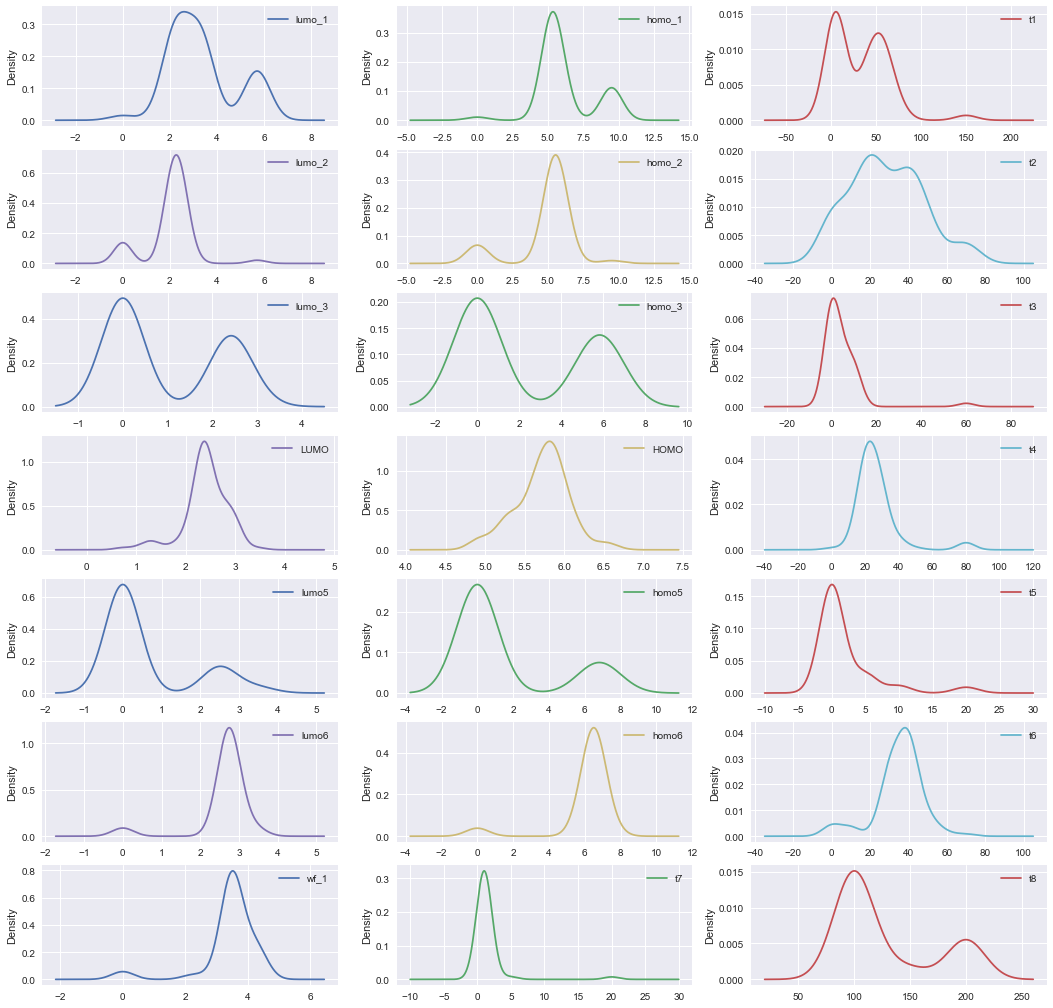

In [25]:
# we can also see the density of the distribution plot
X.plot(kind='density', subplots=True, layout=(7,3), sharex=False)

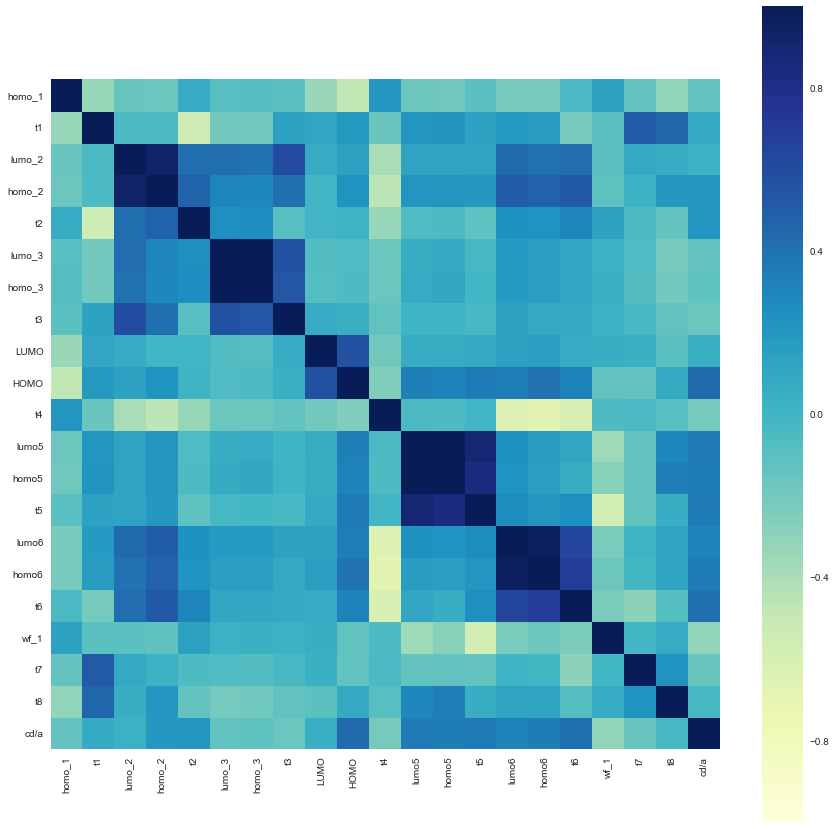

List the features in descending order of their correlation with cd/a:

HOMO:   0.4408692105992884
t6:   0.40809119905406305
lumo5:   0.3666302084174213
t5:   0.35402587102818484
homo5:   0.3463183737021076
homo6:   0.3450656376832737
lumo6:   0.3280784950475893
wf_1:   -0.30924188698221033
t4:   -0.21584415155124356
t2:   0.20687491172957756
homo_2:   0.19637568837948313
t3:   -0.1697594110325318
t7:   -0.1601700187710503
homo_1:   -0.14641736092863514
lumo_3:   -0.13452916383342545
homo_3:   -0.11963717904448168
t1:   0.08137884928486246
LUMO:   0.049336959451351914
lumo_2:   0.03754602755567048
t8:   -0.019040711483331165


In [19]:
# See correlation of features with each other and with efficiency
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/a'].to_dict()
del cor_dict['cd/a']
print("List the features in descending order of their correlation with cd/a:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))